#Parte 1

## Bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Obtendo o Banco de Dados da COVID-19 no Brasil com informações de número de casos e mortos em cada cidade.

## Montagem de Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive


## Leitura dos Bancos de Dados:

In [ ]:
dadosCovid = pd.read_csv(path+"/caso_full.csv.gz",header=None,squeeze=True,low_memory=False)
#Origem dos dados: https://brasil.io/dataset/covid19/files/
label = dadosCovid.loc[0,:]
#Subset das informações mais relevantes sobre a vacinação.
dadosVacinacao = pd.read_csv(path+"/dadosVacinacao.zip",index_col=False,header=None,squeeze=True,low_memory=False)
#Fonte: https://coronavirus.saude.mg.gov.br/dadosabertos -  Sistemas Vacinação

In [ ]:
display(dadosCovid.head(6))
display(dadosVacinacao.head(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,Rio Branco,1200401,2020-03-17,202012,413418,407319,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
2,NaN,12,2020-03-17,202012,894470,881935,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
3,Rio Branco,1200401,2020-03-18,202012,413418,407319,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
4,NaN,12,2020-03-18,202012,894470,881935,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
5,Rio Branco,1200401,2020-03-19,202012,413418,407319,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0


,0,1,2,3,4,5,6,7
0,ID,faixa_etaria,sexo,municipio_res,macro,vacina_nome,data_aplicacao,dose
1,1,60 a 69 anos,MASCULINO,BELO HORIZONTE,CENTRO,CORONAVAC,2021-05-20,2ª Dose


# **Relatório de Desenvolvimento do Trabalho Prático - Parte 1:**

## Obtenção dos Bancos de Dados:
#### Para obter os conjuntos de dados relacionados às informações da COVID-19 no Brasil, utilizamos dados fornecidos pela [brasil.io](https://brasil.io/dataset/covid19/files/), contendo um compilado diário informações das Secretarias Estaduais de Saúde. Entretanto, reduzimos esse conjunto de dados apenas às cidades de Minas Gerais com o propósito de dar um enfoque maior e produzir análises centradas nas macrorregiões de Minas Gerais, gerando um *Dataset* com dados desde o início da pandemia até o último mês de Julho (07/2021).

#### Relativo aos dados da vacinação no estado de Minas Gerais, utilizamos DataFrames oriundos de [Dados Abertos da Saúde de MG](https://coronavirus.saude.mg.gov.br/dadosabertos), em "Sistemas de Vacinação". Nesse Banco de Dados nós fizemos uma redução (subset) para utilizar apenas algumas colunas que nós julgamos mais relevantes e que de fato nos auxiliariam a obter informações importantes neste projeto. Essas decisões estão descritas mais a fundo no arquivo "DataPrep.ipynb"

## Nosso objetivo:

#### A nossa proposta, então, é aplicar posteriormente outras técnicas de *DataPreparation* para finalmente fazer o *join* desses Bancos de Dados para produzir as análises mais significativas acerca dos dados sobre vacinação, casos e óbitos em Minas Gerais e, posteriormente, elaborar *dashboards* que possibilitem um entendimento da nossa análise de maneira mais ao alto nível.



# Parte 2 - *Data Prep*

## **1)** Como nossa análise se restringirá a MG, vamos selecionar apenas as informações dos municípios da referida UF.

In [ ]:
dadosMG = dadosCovid[dadosCovid[15] == "MG"]
display(dadosMG)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
627858,Divinópolis,3122306,2020-03-08,202011,240408,238230,False,False,1,0.41596,2020-03-08,0.0000,0,1,city,MG,1,0
627859,NaN,31,2020-03-08,202011,21292666,21168791,False,False,1,0.00470,2020-03-08,0.0000,0,1,state,MG,1,0
627860,Divinópolis,3122306,2020-03-09,202011,240408,238230,False,False,1,0.41596,2020-03-09,0.0000,0,2,city,MG,0,0
627861,NaN,31,2020-03-09,202011,21292666,21168791,False,False,1,0.00470,2020-03-09,0.0000,0,2,state,MG,0,0
627862,Divinópolis,3122306,2020-03-10,202011,240408,238230,False,False,1,0.41596,2020-03-10,0.0000,0,3,city,MG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005150,Água Boa,3100609,2021-08-08,202132,13523,13735,False,True,511,3778.74732,2021-06-18,0.0137,7,408,city,MG,0,0
1005151,Água Comprida,3100708,2021-08-08,202132,1992,1999,False,True,169,8483.93574,2021-06-18,0.0473,8,436,city,MG,0,0
1005152,Águas Formosas,3100906,2021-08-08,202132,19247,19207,False,True,899,4670.85780,2021-06-18,0.0345,31,431,city,MG,0,0
1005153,Águas Vermelhas,3101003,2021-08-08,202132,13599,13539,False,True,402,2956.09971,2021-06-18,0.0174,7,446,city,MG,0,0


## **2)** Removendo os NaN's e nulos.

In [ ]:
# dadosCovid_1 = dadosCovid_1.dropna()
# print(len(dadosCovid_1[dadosCovid_1[14] == 'state'])) #dropar os 'state' e padronificar os NaN
# teste = dadosCovid_1.isnull()
# teste2 = teste.any(axis=1)
# teste3 = dadosCovid_1[teste2]

dadosMG = dadosMG.drop(dadosMG[dadosMG[14] == 'state'].index)
dadosMG = dadosMG.dropna()
dadosMG

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
627858,Divinópolis,3122306,2020-03-08,202011,240408,238230,False,False,1,0.41596,2020-03-08,0.0000,0,1,city,MG,1,0
627860,Divinópolis,3122306,2020-03-09,202011,240408,238230,False,False,1,0.41596,2020-03-09,0.0000,0,2,city,MG,0,0
627862,Divinópolis,3122306,2020-03-10,202011,240408,238230,False,False,1,0.41596,2020-03-10,0.0000,0,3,city,MG,0,0
627864,Divinópolis,3122306,2020-03-11,202011,240408,238230,False,False,1,0.41596,2020-03-11,0.0000,0,4,city,MG,0,0
627866,Divinópolis,3122306,2020-03-12,202011,240408,238230,False,False,1,0.41596,2020-03-12,0.0000,0,5,city,MG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005149,Wenceslau Braz,3172202,2021-08-08,202132,2548,2552,False,True,175,6868.13187,2021-06-18,0.0229,4,460,city,MG,0,0
1005150,Água Boa,3100609,2021-08-08,202132,13523,13735,False,True,511,3778.74732,2021-06-18,0.0137,7,408,city,MG,0,0
1005151,Água Comprida,3100708,2021-08-08,202132,1992,1999,False,True,169,8483.93574,2021-06-18,0.0473,8,436,city,MG,0,0
1005152,Águas Formosas,3100906,2021-08-08,202132,19247,19207,False,True,899,4670.85780,2021-06-18,0.0345,31,431,city,MG,0,0


In [ ]:
print(f"Quantidade de NA na base de casos do covid: {dadosMG.isnull().sum().sum()}")

for i in range(18):
  print(f"Quantidade de NA na base de casos do covid {i}: {dadosMG[i].isnull().sum().sum()}")

Quantidade de NA na base de casos do covid: 0
Quantidade de NA na base de casos do covid 0: 0
Quantidade de NA na base de casos do covid 1: 0
Quantidade de NA na base de casos do covid 2: 0
Quantidade de NA na base de casos do covid 3: 0
Quantidade de NA na base de casos do covid 4: 0
Quantidade de NA na base de casos do covid 5: 0
Quantidade de NA na base de casos do covid 6: 0
Quantidade de NA na base de casos do covid 7: 0
Quantidade de NA na base de casos do covid 8: 0
Quantidade de NA na base de casos do covid 9: 0
Quantidade de NA na base de casos do covid 10: 0
Quantidade de NA na base de casos do covid 11: 0
Quantidade de NA na base de casos do covid 12: 0
Quantidade de NA na base de casos do covid 13: 0
Quantidade de NA na base de casos do covid 14: 0
Quantidade de NA na base de casos do covid 15: 0
Quantidade de NA na base de casos do covid 16: 0
Quantidade de NA na base de casos do covid 17: 0


In [ ]:
for i in range(18):
  dadosMG[i] = dadosMG[i].str.strip()

In [ ]:
identificacoes = ['NÃO ESPECIFICADO', 'NÃO IDENTIFICADO', 'NÃO LOCALIZADO']
# dadosVacinacao[1] = dadosVacinacao[1].fillna('NÃO ESPECIFICADO')
# dadosVacinacao[dadosVacinacao[1] == 'NÃO ESPECIFICADO']
# dadosVacinacao[2] = dadosVacinacao[2].fillna('NÃO IDENTIFICADO')
# dadosVacinacao[dadosVacinacao[2] == 'NÃO IDENTIFICADO']
# dadosVacinacao[3] = dadosVacinacao[3].fillna('NÃO LOCALIZADO')
# dadosVacinacao[dadosVacinacao[3] == 'NÃO LOCALIZADO']
for i in range(3):
  dadosVacinacao[i+1] = dadosVacinacao[i+1].fillna(identificacoes[i])
dadosVacinacao[dadosVacinacao[3] == 'NÃO LOCALIZADO']



,0,1,2,3,4,5,6,7
545,545,70 a 79 anos,MASCULINO,NÃO LOCALIZADO,VALE DO ACO,CORONAVAC,2021-04-05,2ª Dose
592,592,40 a 49 anos,MASCULINO,NÃO LOCALIZADO,SUDESTE,ASTRAZENECA,2021-06-16,1ª Dose
1352,1352,50 a 59 anos,MASCULINO,NÃO LOCALIZADO,NORTE,ASTRAZENECA,2021-05-28,1ª Dose
1435,1435,60 a 69 anos,FEMININO,NÃO LOCALIZADO,CENTRO SUL,ASTRAZENECA,2021-07-01,2ª Dose
2266,2266,10 a 19 anos,FEMININO,NÃO LOCALIZADO,CENTRO,ASTRAZENECA,2021-07-28,1ª Dose
...,...,...,...,...,...,...,...,...
13247741,13247741,60 a 69 anos,MASCULINO,NÃO LOCALIZADO,CENTRO,ASTRAZENECA,2021-04-14,1ª Dose
13247797,13247797,70 a 79 anos,MASCULINO,NÃO LOCALIZADO,NORTE,CORONAVAC,2021-03-31,1ª Dose
13247854,13247854,60 a 69 anos,FEMININO,NÃO LOCALIZADO,SUDESTE,ASTRAZENECA,2021-06-10,1ª Dose
13248224,13248224,60 a 69 anos,MASCULINO,NÃO LOCALIZADO,NORTE,CORONAVAC,2021-04-16,1ª Dose


In [ ]:
print(f"Quantidade de NA na vacinação: {dadosVacinacao.isna().sum().sum()}")

for i in range(8):
  print(f"Quantidade de NA na vacinação coluna {i}: {dadosVacinacao[i].isnull().sum().sum()}")
 


Quantidade de NA na vacinação: 0
Quantidade de NA na vacinação coluna 0: 0
Quantidade de NA na vacinação coluna 1: 0
Quantidade de NA na vacinação coluna 2: 0
Quantidade de NA na vacinação coluna 3: 0
Quantidade de NA na vacinação coluna 4: 0
Quantidade de NA na vacinação coluna 5: 0
Quantidade de NA na vacinação coluna 6: 0
Quantidade de NA na vacinação coluna 7: 0


## **3)** Alteração de tipos de alguns atributos:

In [ ]:
"""
  Como nós iremos fazer a soma de casos e mortes, esses valores precisam ser numéricos.
"""
dadosMG[16] = pd.to_numeric(dadosMG[16])
dadosMG[17] = pd.to_numeric(dadosMG[17])
dadosMG[4] = pd.to_numeric(dadosMG[4])
display(dadosMG)
#Fonte: https://www.ti-enxame.com/pt/python/alterar-tipo-de-dados-de-colunas-em-pandas/1072113742/
dadosMG[0] = dadosMG[0].str.upper()
dadosMG[0] = dadosMG[0].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dadosMG_1 = dadosMG.copy()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
627858,Divinópolis,3122306,2020-03-08,202011,240408,238230,False,False,1,0.41596,2020-03-08,0.0000,0,1,city,MG,1,0
627860,Divinópolis,3122306,2020-03-09,202011,240408,238230,False,False,1,0.41596,2020-03-09,0.0000,0,2,city,MG,0,0
627862,Divinópolis,3122306,2020-03-10,202011,240408,238230,False,False,1,0.41596,2020-03-10,0.0000,0,3,city,MG,0,0
627864,Divinópolis,3122306,2020-03-11,202011,240408,238230,False,False,1,0.41596,2020-03-11,0.0000,0,4,city,MG,0,0
627866,Divinópolis,3122306,2020-03-12,202011,240408,238230,False,False,1,0.41596,2020-03-12,0.0000,0,5,city,MG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005149,Wenceslau Braz,3172202,2021-08-08,202132,2548,2552,False,True,175,6868.13187,2021-06-18,0.0229,4,460,city,MG,0,0
1005150,Água Boa,3100609,2021-08-08,202132,13523,13735,False,True,511,3778.74732,2021-06-18,0.0137,7,408,city,MG,0,0
1005151,Água Comprida,3100708,2021-08-08,202132,1992,1999,False,True,169,8483.93574,2021-06-18,0.0473,8,436,city,MG,0,0
1005152,Águas Formosas,3100906,2021-08-08,202132,19247,19207,False,True,899,4670.85780,2021-06-18,0.0345,31,431,city,MG,0,0


Escolhendo uma cidade específica para conhecer melhor algumas informações do dataset.

In [ ]:
selecao = (dadosVacinacao[6] >= '2021-01-18')

dadosVacinacao = dadosVacinacao[selecao]


# **Relatório de Desenvolvimento do Trabalho Prático - Parte 2:**

## Redução dos Bancos de Dados:
#### Os conjuntos de dados que nós obtivemos eram muito grandes para serem lidos em tempo e recursos hábeis pelos componentes do grupo (Parte 1). Dessa forma, nós utilizamos o Dicionário desses dados e pegamos apenas um subset das colunas que mais nos interessavam para essa aplicação. Dessa forma, tivemos uma redução de cerca de +- 7GB de Dados. Como nosso escopo é focado no estado de Minas Gerais, essa redução NÃO ACOMETERÁ NENHUMA INTERFERÊNCIA EM NOSSA ANÁLISE.

## Tratamento de valores NaN:    
#### Tanto no Banco de Dados de Casos e Mortes da COVID-19 quanto no Banco de Dados da Vacinação possuiam alguns registros com valores NaN em algumas colunas. Na nossa concepção, apenas excluir esses registros dos *Datasets* seria uma perda de informação lastimável e, dessa forma, decidimos tratar esses valores da seguinte forma: verficamos a coluna onde havia a ocorrência de NaN e, de acordo com a coluna, nós atribuimos um valor para aquele registro do tipo "Não especificado", "Não identificado", etc. Dessa forma, mantemos a essência do registro em si e, ainda assim, podemos fazer análises e obter métricas acerca dos dados faltantes.

## Mudança de tipos:
#### Realizando alguns testes iniciais e algumas operações com os dados, nos deparamos que alguns valores númericos estão tipados como string. Dessa forma, em algumas colunas como Número de Casos no Dia(16) e Números de Óbitos do Dia(17) nós convertemos o registro de string para numérico, com intuito de, posteriormente, poder somar esses dados e obter resultados de acordo com critérios como: por cidade, por macrorregião, por faixa etária, etc.

## Nossas observações:
#### Nessa etapa, fizemos algumas verificações que nós julgamos mais incisas sobre a parte de análise e tratamento de dados e obtivemos resultados satisfatórios. Em geral, os *Datasets* apresentaram uma estrutura de registros bem consistente, sendo necessário realizar apenas alguns ajustes que dizem respeito mais à nossa aplicação do que a ruídos em si. Conseguimos realizar os tratamentos que nos fosse necessário e temos a convicção que os dados estão prontos para serem utilizados na próxima etapa.



# Parte 3 - *Análise Exploratória*

## **1) Como Minas Gerais é representada quando comparada a média de casos do país?**

In [ ]:
numCasos = dadosCovid[dadosCovid[14] == 'state']

numCasos = numCasos[[15,16]]

numCasos[16] = pd.to_numeric(numCasos[16])

numCasosGrouped = numCasos.groupby([15]).sum([16]).mean()

print(f'a média por estado de casos de covid no país é: {float(numCasosGrouped):.2f}')

a média por estado de casos de covid no país é: 747005.11


In [ ]:
dados_de_MG = dadosCovid[dadosCovid[15] == "MG"]

for i in range(18):
  dados_de_MG[i] = dados_de_MG[i].str.strip()

dados_de_MG[16] = pd.to_numeric(dados_de_MG[16])
dados_de_MG[17] = pd.to_numeric(dados_de_MG[17])

In [ ]:
dadosMGCasos = dados_de_MG[dados_de_MG[14] == 'state']
dadosMGCasos = dadosMGCasos[[15,16]]
dadosMGCasos = dadosMGCasos.groupby([15]).sum()
dadosMGCasos = int(dadosMGCasos[16])

In [ ]:
localComparadoGlobal = dadosMGCasos/int(numCasosGrouped) #.

print(f'Quando comparado com a média do pais, MG possui {localComparadoGlobal:.2f}x casos a mais')



Quando comparado com a média do pais, MG possui 2.67x casos a mais


## **2) Como Minas Gerais é representada quando comparada a média de óbitos do país?**

In [ ]:
numCasosObito = dadosCovid[dadosCovid[14] == 'state']

numCasosObito = numCasosObito[[15,17]]


numCasosObito[17] = pd.to_numeric(numCasosObito[17])

numCasosObitoGrouped = numCasosObito.groupby([15]).sum([17]).mean()
print(f'a média por estado de óbitos de covid no país é: {float(numCasosObitoGrouped):.2f}')

a média por estado de óbitos de covid no país é: 20866.59


In [ ]:
dadosMGCasosObito = dados_de_MG[dados_de_MG[14] == 'state']
dadosMGCasosObito = dadosMGCasosObito[[15,17]]
dadosMGCasosObito = dadosMGCasosObito.groupby([15]).sum()
dadosMGCasosObito = int(dadosMGCasosObito[17])

In [ ]:
localComparadoGlobalObito =dadosMGCasosObito/int(numCasosObitoGrouped) #quando comparado com a média MG possui 2,45 casos de óbito à mais.
print(f'Quando comparado com a média do pais, MG possui {localComparadoGlobalObito:.2f}x óbitos a mais')

Quando comparado com a média do pais, MG possui 2.46x óbitos a mais


## **3) Qual a cidade com menor incidência total de casos?**

In [ ]:
numCasosCity = dadosCovid[dadosCovid[14] == 'city']

numCasosCity = numCasosCity[[0,16]]


numCasosCity[16] = pd.to_numeric(numCasosCity[16])

numCasosCityGrouped = numCasosCity.groupby([0]).sum()

teste = numCasosCityGrouped.reset_index()

maxObitos = teste[teste[16] == teste[16].min()]

print("O mínimo de óbitos é representado por: ")
display(maxObitos)

O mínimo de óbitos é representado por: 


,0,16
2933,Miravânia,10


## **4) Quais foram as 5 cidades com maiores incidências de cada região?**

In [ ]:
numCasosRegiaoTotal = []
for estado in (dadosCovid[15].unique()[1:]):
  numCasosRegiao = dadosCovid[dadosCovid[15] == estado]
  numCasosRegiao = numCasosRegiao[numCasosRegiao[14] == 'city']
  numCasosRegiao[16] = pd.to_numeric(numCasosRegiao[16])
  numCasosRegiao = numCasosRegiao.groupby([0,15], as_index=False).sum()
  numCasosRegiao = numCasosRegiao.sort_values(by=[16], ascending=False)
  numCasosRegiao.columns = ['cidade','estado','qtdCasos']
  numCasosRegiaoTotal.append(numCasosRegiao.head(5))

numCasosRegiaoTotal = pd.concat(numCasosRegiaoTotal, axis=0).reset_index()
#Estamos considerando cada estado como uma região.




In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(numCasosRegiaoTotal)
pd.reset_option("^display.", silent=True)

,index,cidade,estado,qtdCasos
0,15,Rio Branco,AC,38006
1,5,Cruzeiro do Sul,AC,7809
2,20,Tarauacá,AC,6555
3,18,Sena Madureira,AC,5845
4,7,Feijó,AC,3330
5,46,Maceió,AL,83093
6,1,Arapiraca,AL,29123
7,51,Marechal Deodoro,AL,6274
8,66,Palmeira dos Índios,AL,4668
9,85,Santana do Ipanema,AL,4525


## **5) Qual a variabilidade de casos de Covid-19 entre dois meses seguidos quaisquer olhando os dados de todo o país.**

In [ ]:
import datetime


In [ ]:
# dadosCovid[dadosCovid[2] == 'date']
dadosCovid2 = dadosCovid.drop(0)
dadosCovid2 = dadosCovid2[dadosCovid2[14] == 'state']
date_before_Setembro = (pd.Timestamp(2020, 9, 1))
date_after_Setembro = (pd.Timestamp(2020, 10, 1))

date_before_Outubro = (pd.Timestamp(2020, 10, 1))
date_after_Outubro = (pd.Timestamp(2020, 11, 1))
dadosCovid2[2] = pd.to_datetime(dadosCovid2[2], format='%Y-%m-%d')
incidenciaSetembro_2020 = dadosCovid2[(dadosCovid2[2] >= date_before_Setembro) & (dadosCovid2[2] < date_after_Setembro)]
incidenciaOutubro_2020 = dadosCovid2[(dadosCovid2[2] >= date_before_Outubro) & (dadosCovid2[2] < date_after_Outubro)]

incidenciaSetembro_2020[16] = pd.to_numeric(incidenciaSetembro_2020[16])
incidenciaOutubro_2020[16] = pd.to_numeric(incidenciaOutubro_2020[16])

incidenciaSetembro_2020 = incidenciaSetembro_2020[[2,16]]
incidenciaOutubro_2020 = incidenciaOutubro_2020[[2,16]]


In [ ]:

totalSetembro_2020 = int(incidenciaSetembro_2020.sum())
totalOutubro_2020 = int(incidenciaOutubro_2020.sum())

variabilidade = totalSetembro_2020 - totalOutubro_2020

print(f"Considerando os meses de setembro de 2020 e outubro de 2020, temos uma variabilidade de: {variabilidade} casos.")


Considerando os meses de setembro de 2020 e outubro de 2020, temos uma variabilidade de: 182138 casos.


Podemos notar que em Outubro de 2020 houve um aumento de casos de incidencia de COVID-19 no país, com um aumento de 182138 em relação ao mês anterior(Setembro)

## **6) Qual o estado com maior incidência de casos de forma semestral?**

In [ ]:
dadosCovid3 = dadosCovid.drop(0)
dadosCovid3 = dadosCovid3[dadosCovid3[14] == 'state']
dadosCovid3[2] = pd.to_datetime(dadosCovid3[2], format='%Y-%m-%d')

date_semester_begin = (pd.Timestamp(2020, 7, 1))
date_semester_end = (pd.Timestamp(2020, 12, 31))

incidencia_Segundo_Semestre_2020 = dadosCovid3[(dadosCovid3[2] >= date_semester_begin) & (dadosCovid3[2] < date_semester_end)]

incidencia_Segundo_Semestre_2020[16] = pd.to_numeric(incidencia_Segundo_Semestre_2020[16])

incidencia_Segundo_Semestre_2020 = incidencia_Segundo_Semestre_2020[[2,16,15]]


In [ ]:

total_Segundo_Semestre_2020 = incidencia_Segundo_Semestre_2020.groupby([15], as_index=False).sum()
total_Segundo_Semestre_2020 = total_Segundo_Semestre_2020.sort_values(by=[16], ascending=False)
print('O estado é:')
display(total_Segundo_Semestre_2020.head(1))

O estado é:


,15,16
25,SP,1170698


## **7) No estado de maior incidência, qual cidade possui o maior número de casos?**

In [ ]:
numCasosState = dadosCovid[dadosCovid[14] == 'state']
numCasosState = numCasosState[[15,16]]
numCasosState[16] = pd.to_numeric(numCasosState[16])
numCasosStateGrouped = numCasosState.groupby([15]).sum()
numTotalCasosState = numCasosStateGrouped.reset_index()
numTotalCasosState = numTotalCasosState.sort_values(by=[16], ascending=False)
estadoNumCasosMax = numTotalCasosState.head(1)

print("O estado com maior incidência de casos é:")
display(estadoNumCasosMax)

O estado com maior incidência de casos é:


,15,16
25,SP,4117467


In [ ]:
numCasosCidadeSP = dadosCovid[dadosCovid[15] == 'SP']
numCasosCidadeSP = numCasosCidadeSP[numCasosCidadeSP[14] == 'city']
numCasosCidadeSP = numCasosCidadeSP[[0,16]]
numCasosCidadeSP[16] = pd.to_numeric(numCasosCidadeSP[16])
numCasosCidadeSP = numCasosCidadeSP.groupby([0], as_index=False).sum()
numCasosCidadeSP = numCasosCidadeSP.sort_values(by=[16], ascending=False)

print("As cidades com maior indiência são:")
display(numCasosCidadeSP.head(5))


As cidades com maior indiência são:


,0,16
573,São Paulo,911605
100,Campinas,104629
563,São José do Rio Preto,91074
564,São José dos Campos,87923
480,Ribeirão Preto,74500


## **8) Qual o estado com maior casos de óbito de COVID-19?**

In [ ]:
numObitosState = dadosCovid[dadosCovid[14] == 'state']
numObitosState = numObitosState[[15,17]]
numObitosState[17] = pd.to_numeric(numObitosState[17])
numObitosStateGrouped = numObitosState.groupby([15]).sum()
numTotalObitosState = numObitosStateGrouped.reset_index()
numTotalObitosState = numTotalObitosState.sort_values(by=[17], ascending=False)
estadoNumObitosMax = numTotalObitosState.head(1)

print('O estado com maior casos de óbito é:')
display(estadoNumObitosMax)

O estado com maior casos de óbito é:


,15,17
25,SP,140755


## **9) No estado de maior número de óbitos, qual cidade possui o maior número de óbitos?**

In [ ]:
numObitosCidadeSP = dadosCovid[dadosCovid[15] == 'SP']
numObitosCidadeSP = numObitosCidadeSP[numObitosCidadeSP[14] == 'city']
numObitosCidadeSP = numObitosCidadeSP[[0,17]]
numObitosCidadeSP[17] = pd.to_numeric(numObitosCidadeSP[17])
numObitosCidadeSPGrouped = numObitosCidadeSP.groupby([0], as_index=False).sum()
numObitosCidadeSPGrouped = numObitosCidadeSPGrouped.sort_values(by=[17], ascending=False)

print("as cidades com maior número de óbito são: ")
display(numObitosCidadeSPGrouped.head(5))

as cidades com maior número de óbito são: 


,0,17
573,São Paulo,35679
204,Guarulhos,4714
100,Campinas,4146
555,São Bernardo do Campo,3125
529,Santo André,2924


In [ ]:
numObitosCidadeSPMax = numObitosCidadeSPGrouped.head(1)

print("Já a cidade com o maior número é: ")
display(numObitosCidadeSPMax)

Já a cidade com o maior número é: 


,0,17
573,São Paulo,35679


## **10) Dentre as maiores 5 cidades cidades do país, qual possui uma maior incidência de casos? E qual possui uma menor incidência de casos?**

In [ ]:
maioresCidades = ['São Paulo', 'Rio de Janeiro', 'Brasília', 'Salvador', 'Fortaleza']
incidenciaCidades = []
for cidade in maioresCidades:
  numIncidenciaCidade = dadosCovid[dadosCovid[0] == cidade]
  numIncidenciaCidade = numIncidenciaCidade[numIncidenciaCidade[14] == 'city']
  numIncidenciaCidade = numIncidenciaCidade[[0,15,16]]
  numIncidenciaCidade[16] = pd.to_numeric(numIncidenciaCidade[16])
  numIncidenciaCidadeGrouped = numIncidenciaCidade.groupby([0]).sum()
  incidenciaCidades.append(numIncidenciaCidadeGrouped)

incidenciaCidades = pd.concat(incidenciaCidades, axis=0).reset_index()
incidenciaCidades = incidenciaCidades.sort_values(by=[16], ascending=False)
display(incidenciaCidades)


,0,16
0,São Paulo,911605
1,Rio de Janeiro,409881
2,Brasília,399047
4,Fortaleza,253842
3,Salvador,232254


Dentre as 5 maiores cidades do país a que possui o maior número de incidencias é a cidade de São Paulo, com 911605 casos registrados. Em contrapartida a cidade com o menor número de casos, dentre as 5 maiores, é a cidade de Salvador, com 232254 casos registrados.

## **11) Existe uma correlação mensal da quantidade de casos de covid-19 entre os anos de 2020 e 2021? E uma correlação de aumento de casos? O que podemos notar quando comparamos a quantidade de casos nestes dois períodos, e qual pode ser a causa dessa diferença?**

In [ ]:
def compara2020_2021(mes):
  anos = [2020, 2021]
  tabelas = []
  for ano in anos:
    dadosCovid3 = dadosCovid.drop(0)
    dadosCovid3 = dadosCovid3[dadosCovid3[14] == 'state']
    dadosCovid3[2] = pd.to_datetime(dadosCovid3[2], format='%Y-%m-%d')

    date_semester_begin = (pd.Timestamp(ano, mes, 1))
    date_semester_end = (pd.Timestamp(ano, mes, 31))

    ObitosJunhoAgosto = dadosCovid3[(dadosCovid3[2] >= date_semester_begin) & (dadosCovid3[2] < date_semester_end)]

    ObitosJunhoAgosto[17] = pd.to_numeric(ObitosJunhoAgosto[17])

    ObitosJunhoAgosto = ObitosJunhoAgosto[[2,17,15]]
    # display(ObitosJunhoAgosto.groupby([15], as_index=False).sum().sort_values(by=[17], ascending=False))
    tabelas.append(ObitosJunhoAgosto.groupby([15], as_index=False).sum().sort_values(by=[17], ascending=False))

  for i in tabelas:
    display(i)
    print('\n\n')

In [ ]:
compara2020_2021(8) #agosto

,15,17
25,SP,6981
10,MG,2557
18,RJ,2550
4,BA,1881
22,RS,1519
8,GO,1412
17,PR,1331
23,SC,1133
15,PE,1017
6,DF,1000


,15,17
25,SP,1759
10,MG,856
18,RJ,715
17,PR,601
8,GO,501
22,RS,242
15,PE,232
12,MT,217
4,BA,205
23,SC,200


Fazendo um comparativo entre as duas tabelas que dizem respeito ao mês de agosto, existe uma grande diminuição no número de casos. Podemos pensar que isso seja devido a ocorrência de vacinações, visto que em agosto de 2021 grande parte da população já tinha tomado a segunda dose.

## **12) Existe uma diminuição ou aumento de casos durante feriados nacionais?**
Os membros do grupo chegaram a conclusão que não seria possível criar uma correlação entre feriados nacionais e aumento ou diminuição dos casos de Covid-19

## **13) Houve alguma notável mudança de incidência após o início da vacinação no país? Faça as comparações com base nos cinco maiores estados do país.**

In [ ]:
def comparaIncidencia2020_2021(mes, estado):
  anos = [2020, 2021]
  tabelas = []
  for ano in anos:
    dadosCovid3 = dadosCovid.drop(0)
    dadosCovid3 = dadosCovid3[dadosCovid3[15] == estado]

    dadosCovid3 = dadosCovid3[dadosCovid3[14] == 'state']
    dadosCovid3[2] = pd.to_datetime(dadosCovid3[2], format='%Y-%m-%d')

    date_semester_begin = (pd.Timestamp(ano, mes, 1))
    date_semester_end = (pd.Timestamp(ano, mes, 31))

    IncidenciaJunhoAgosto = dadosCovid3[(dadosCovid3[2] >= date_semester_begin) & (dadosCovid3[2] < date_semester_end)]

    IncidenciaJunhoAgosto[16] = pd.to_numeric(IncidenciaJunhoAgosto[16])

    IncidenciaJunhoAgosto = IncidenciaJunhoAgosto[[2,16,15]]
    # display(IncidenciaJunhoAgosto.groupby([15], as_index=False).sum().sort_values(by=[16], ascending=False))
    tabelas.append(IncidenciaJunhoAgosto.groupby([15], as_index=False).sum()) #.sort_values(by=[16], ascending=False))

  for i in tabelas:
    display(i)
    print('\n\n')

In [ ]:
estados = ['SP', 'MG', 'RJ', 'BA', 'PR']

print("Comparando os anos de 2020 e 2021 a patir do mês de agosto, temos as seguinte correlação,\nonde para cada estado, a primeira linha representa o ano de 2020 e a segunda o ano de 2021.")
for estado in estados:
  comparaIncidencia2020_2021(8, estado)

Comparando os anos de 2020 e 2021 a patir do mês de agosto, temos as seguinte correlação,
onde para cada estado, a primeira linha representa o ano de 2020 e a segunda o ano de 2021.


,15,16
0,SP,261100


,15,16
0,SP,59599


,15,16
0,MG,87944


,15,16
0,MG,31351


,15,16
0,RJ,57807


,15,16
0,RJ,28752


,15,16
0,BA,89908


,15,16
0,BA,8745


,15,16
0,PR,54491


,15,16
0,PR,23384


## **14) Levante as diferenças da evolução nos casos de COVID-19 entre o Brasil e o Japão.**

In [ ]:
def evolucaoCovid():
  dadosCovid3 = dadosCovid.drop(0)

  dadosCovid3 = dadosCovid3[dadosCovid3[14] == 'state']
  dadosCovid3[2] = pd.to_datetime(dadosCovid3[2], format='%Y-%m-%d')

  date_semester_begin = (pd.Timestamp(2020, 2, 25))
  date_semester_end = (pd.Timestamp(2020, 8, 25))

  IncidenciaEvolucao = dadosCovid3[(dadosCovid3[2] >= date_semester_begin) & (dadosCovid3[2] < date_semester_end)]

  IncidenciaEvolucao[16] = pd.to_numeric(IncidenciaEvolucao[16])

  IncidenciaEvolucao = IncidenciaEvolucao[[2,16,15]]
  # display(IncidenciaEvolucao.groupby([15], as_index=False).sum().sort_values(by=[16], ascending=False))

  novoDf = IncidenciaEvolucao.groupby([15], as_index=False).sum().sort_values(by=[16], ascending=False)
  novoDf = (pd.DataFrame(novoDf))
  return novoDf[16].sum()
  # tabelas.append(IncidenciaEvolucao.groupby([15], as_index=False).sum()) #.sort_values(by=[16], ascending=False))
  # return novoDf

In [ ]:
numCasosBrasil = evolucaoCovid()

#relativizando essa informação:
# print(numCasos)
numCasosBrasil_por_populacao = numCasosBrasil/(212600000) * 100

print(f'Número de casos de covid nos primeiros 6 meses no Brasil pela população do País {numCasosBrasil_por_populacao:.2f}%')

Número de casos de covid nos primeiros 6 meses no Brasil pela população do País 1.71%


**Dados Japão**

In [ ]:
data_amostra = pd.read_csv(path+"/owid-covid-data.csv")
#WHO COVID-19 global table data October 10th 2021 at 10.33.17 PM

In [ ]:
dados_japan = data_amostra[data_amostra['location'] == 'Japan']

In [ ]:
dados_japan['date'] = pd.to_datetime(dados_japan['date'], format='%Y-%m-%d')

date_semester_begin = (pd.Timestamp(2020, 1, 22))
date_semester_end = (pd.Timestamp(2020, 7, 22))
dados_japan['new_cases'] = pd.to_numeric(dados_japan['new_cases'])
dados_japan_semester = dados_japan[(dados_japan['date'] >= date_semester_begin) & (dados_japan['date'] < date_semester_end)]
# display(dados_japan_semester)

In [ ]:
dados_japan_grouped = dados_japan.groupby(['location']).sum()
numCasosJapao = int(dados_japan_grouped['new_cases'])

numCasosJapao_por_populacao = numCasosJapao/125800000 * 100
print(f'Número de casos de covid nos primeiros 6 meses no Japão pela população do País {numCasosJapao_por_populacao:.2f}%')

# display(dados_japan_semester)

Número de casos de covid nos primeiros 6 meses no Japão pela população do País 1.36%


**Gráficos**

In [ ]:
dadosCovid3 = dadosCovid.drop(0)

dadosCovid3 = dadosCovid3[dadosCovid3[14] == 'state']
dadosCovid3[2] = pd.to_datetime(dadosCovid3[2], format='%Y-%m-%d')

date_semester_begin = (pd.Timestamp(2020, 2, 25))
date_semester_end = (pd.Timestamp(2020, 8, 25))

IncidenciaEvolucao = dadosCovid3[(dadosCovid3[2] >= date_semester_begin) & (dadosCovid3[2] <= date_semester_end)]

IncidenciaEvolucao[16] = pd.to_numeric(IncidenciaEvolucao[16])

IncidenciaEvolucao = IncidenciaEvolucao[[2,16,15]]

IncidenciaEvolucao.groupby([2], as_index=False).sum()

,2,16
0,2020-02-25,1
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,1
4,2020-02-29,0
...,...,...
178,2020-08-21,32326
179,2020-08-22,45908
180,2020-08-23,21869
181,2020-08-24,23517


In [ ]:
IncidenciaEvolucao[2] = IncidenciaEvolucao[2].dt.strftime('%m/%Y')


In [ ]:
dados_japan_semester['date'] = dados_japan_semester['date'].dt.strftime('%m/%Y')


Considerando o número de casos em um período mensal durante os primeiro 6 
meses, partindo do período onde ouveram os registros 
dos primeiros casos dos países analisados (Brasil e Japão),temos os seguintes gráficos:


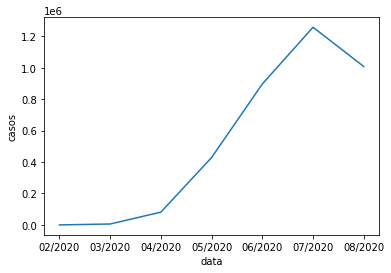

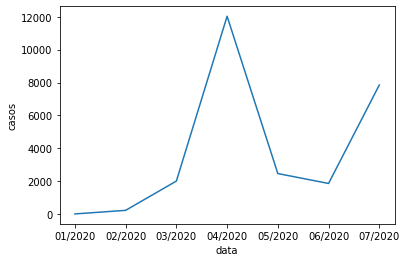

In [ ]:
print("Considerando o número de casos em um período mensal durante os primeiro 6 \nmeses, partindo do período onde ouveram os registros \ndos primeiros casos dos países analisados (Brasil e Japão),temos os seguintes gráficos:")

plt.plot(IncidenciaEvolucao.groupby([2]).sum()[16])
plt.xlabel('data')
plt.ylabel('casos')
plt.show()

plt.plot(dados_japan_semester.groupby('date').sum()['new_cases'])
plt.xlabel('data')
plt.ylabel('casos')
plt.show()

In [ ]:
#A partir desse momento, a variável "dadosCovid" diz respeito a dados de Minas Gerais.
dadosCovid = dadosMG

## **15) Qual a macrorregião mineira que mais vacinou antecipadamente ? Qual seu desempenho em relação a diminuição de novos casos quando comparada às demais regiões ?<br>16) Qual a macrorregião mineira que menos vacinou antecipadamente ? Qual seu desempenho em relação ao aumento/constância de novos casos quando comparada às demais regiões ?**

,Região,Vacinados
0,CENTRO,1220167
1,CENTRO SUL,158675
2,JEQUITINHONHA,79104
3,LESTE,132467
4,LESTE DO SUL,137161
5,NORDESTE,159986
6,NOROESTE,140027
7,NORTE,267174
8,OESTE,219978
9,SUDESTE,325526


Text(0, 0.5, 'Macrorregião')

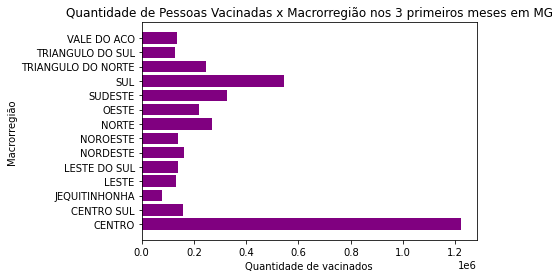

In [ ]:
# Tabela com dados de vacinação nos 3 primeiros meses
selecaoAntecipada = ((dadosVacinacao[6] >= '2021-01-18') & (dadosVacinacao[6] <= '2021-04-18'))
df_antecipado = dadosVacinacao[selecaoAntecipada]
#dadosVacinacao.loc[:,[4,6]].sort_values([6])
df_antecipado = (df_antecipado.loc[:,[4,6]].sort_values([6]).groupby([4]).size().reset_index(name='Vacinados').rename(columns={4: 'Região'}))
display(df_antecipado)
plt.barh(df_antecipado.Região,df_antecipado.Vacinados,color="purple")
plt.title("Quantidade de Pessoas Vacinadas x Macrorregião nos 3 primeiros meses em MG")
plt.xlabel("Quantidade de vacinados")
plt.ylabel("Macrorregião")


In [ ]:
regioes = df_antecipado.loc[:,"Região"]
regioes = np.array(regioes)
df_cidades_regiao = dadosVacinacao.loc[1:,[3,4]].drop_duplicates(subset = 3)
lista_cidades_mg = np.array(df_cidades_regiao[3])  
df_cidades_regiao

,3,4
1,BELO HORIZONTE,CENTRO
2,SANTA LUZIA,CENTRO
3,PORTEIRINHA,NORTE
4,IPATINGA,VALE DO ACO
5,UBERLANDIA,TRIANGULO DO NORTE
...,...,...
13075405,ANGULO,SUL
13096813,BERTOLINIA,NOROESTE
13098652,SANTO ANTONIO DO PALMA,TRIANGULO DO SUL
13128578,TRES FORQUILHAS,SUL


In [ ]:
def listaCidadesMacro(macro):
  return np.sort(np.array(df_cidades_regiao[3][df_cidades_regiao[4] == macro]))



In [ ]:
cidadesCentro = listaCidadesMacro("CENTRO") #Onde mais se vacinou antecipadamente
cidadesJequi = listaCidadesMacro("JEQUITINHONHA") #Onde menos se vacionou antecipadamente
periodoAntesVacinacao = (dadosCovid[2] >= '2020-01-01') & (dadosCovid[2] <= '2021-01-18') # Do inicio da pandemia até o inicio da vacinacao
dfAntes = dadosCovid[periodoAntesVacinacao]

periodoDepoisVacinacao = (dadosCovid[2] >= '2021-01-18')
dfDepois = dadosCovid[periodoDepoisVacinacao]
print("CENTRO:")
#Centro
casosAntes = dfAntes[dfAntes[0].isin(cidadesCentro)]
numCasosAntesCentro = casosAntes[16].sum()
numObitosAntesCentro = casosAntes[17].sum()
print(f"Número de casos antes da vacinação: {numCasosAntesCentro}")
print(f"Número de óbitos antes da vacinação: {numObitosAntesCentro}")


casosDepois = dfDepois[dfDepois[0].isin(cidadesCentro)]
numCasosDepoisCentro = casosDepois[16].sum()
numObitosDepoisCentro = casosDepois[17].sum()
print(f"Número de casos depois da vacinação: {numCasosDepoisCentro}")
print(f"Número de óbitos depois da vacinação: {numObitosDepoisCentro}")
print(f"Houve um aumento de {((numCasosDepoisCentro-numCasosAntesCentro)/numCasosAntesCentro)*100}% no número de novos casos.")
print(f"Houve um aumento de {((numObitosDepoisCentro-numObitosAntesCentro)/numObitosAntesCentro)*100}% no número óbitos.")

print("\n\n")
#Jequitinhonha
print("JEQUITINHONHA:")
casosAntes = dfAntes[dfAntes[0].isin(cidadesJequi)]
numCasosAntesJequi = casosAntes[16].sum()
numObitosAntesJequi = casosAntes[17].sum()
print(f"Número de casos antes da vacinação: {numCasosAntesJequi}")
print(f"Número de óbitos antes da vacinação: {numObitosAntesJequi}")


casosDepois = dfDepois[dfDepois[0].isin(cidadesJequi)]
numCasosDepoisJequi = casosDepois[16].sum()
numObitosDepoisJequi = casosDepois[17].sum()
print(f"Número de casos depois da vacinação: {numCasosDepoisJequi}")
print(f"Número de óbitos depois da vacinação: {numObitosDepoisJequi}")
print(f"Houve um aumento de {((numCasosDepoisJequi-numCasosAntesJequi)/numCasosAntesJequi)*100}% no número de novos casos.")
print(f"Houve um aumento de {((numObitosDepoisJequi-numObitosAntesJequi)/numObitosAntesJequi)*100}% no número óbitos.")

#print(plt.plot(casosAntes[2],casosAntes[16]))


CENTRO:
Número de casos antes da vacinação: 199724
Número de óbitos antes da vacinação: 4560
Número de casos depois da vacinação: 333066
Número de óbitos depois da vacinação: 9613
Houve um aumento de 66.76313312371072% no número de novos casos.
Houve um aumento de 110.81140350877192% no número óbitos.



JEQUITINHONHA:
Número de casos antes da vacinação: 4628
Número de óbitos antes da vacinação: 58
Número de casos depois da vacinação: 14757
Número de óbitos depois da vacinação: 270
Houve um aumento de 218.86343993085563% no número de novos casos.
Houve um aumento de 365.51724137931035% no número óbitos.


## **17) Qual a cidade mineira com o menor número de novos casos pós ínicio de vacinação ? A que região ela pertence ? Como ela se compara com o a média das médias das outras cidades de sua macrorregião ? E em relação à média das outras macrorregiões, como ela se compara ?**

In [ ]:
menor = 9999999999999999 
cidade = ""
for i in lista_cidades_mg:
    conta = dfDepois[16][dfDepois[0]==i].sum()/int(np.resize(dfDepois[4][dfDepois[0]==i].unique(),(1,1)))
    if (conta < menor) and (conta>0):
      menor = conta
      cidade = i
  
print(f"Cidade com o menor taxa de novos casos após a vacinação {cidade}")
print(f"Taxa de novos casos após a vacinação (novos casos/população estimada):{menor}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


Cidade com o menor taxa de novos casos após a vacinação MIRAVANIA
Taxa de novos casos após a vacinação (novos casos/população estimada):0.0010175010175010174


In [ ]:
print(f"Pertence à região {df_cidades_regiao[4][df_cidades_regiao[3]==cidade].unique()[0]}")

Pertence à região NORTE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


Média das cidades de MG: 0.04585659347651355


Text(0, 0.5, 'Novos casos/População')

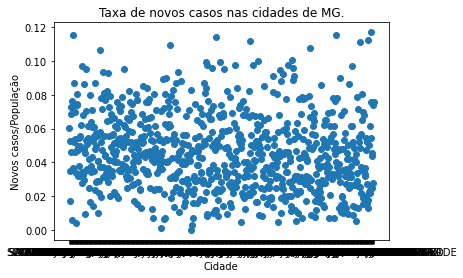

In [ ]:
taxa_cidades_mg = []
cidades = lista_cidades_mg
for i in cidades:
  taxa = dfDepois[16][dfDepois[0]==i].sum()/int(np.resize(dfDepois[4][dfDepois[0]==i].unique(),(1,1)))
  if (taxa>=0):
    taxa_cidades_mg.append(taxa)
  else:
    cidades = cidades[cidades != i] 
    


media = 0
taxa_cidades_mg = [x for x in taxa_cidades_mg if str(x) != 'nan']

for i in taxa_cidades_mg:
  if (i>0):
    media  = media + (i/len(taxa_cidades_mg))

print(f"Média das cidades de MG: {media}")
plt.scatter(x=cidades,y=taxa_cidades_mg)
plt.title("Taxa de novos casos nas cidades de MG.")
plt.xlabel("Cidade")
plt.ylabel("Novos casos/População")


## **18) Qual a macrorregião mineira que possui a diferença mais alta de novos casos, considerando antes e depois da vacinação, ou seja, qual macrorregião que diminuiu mais o índice de novos casos ?**

Macrorregião com o maior percentual de aumento de novos casos: JEQUITINHONHA com 218.86343993085563%.
Macrorregião com o menor percentual de aumento de novos casos: VALE DO ACO com 0.5009364352280163%.


Text(0, 0.5, 'Taxa de aumento de novos casos')

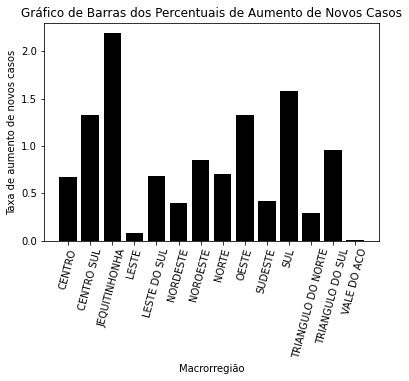

In [ ]:
maior = -999999999999999
macroMaior = ""

menor = 9999999999999999
macroMenor = ""

valoresMacros = []
somaMacro = 0
for i in regioes:
  #print(f"Macro: {i}")
  cidadesMacro = listaCidadesMacro(i)

  casosAntes = dfAntes[dfAntes[0].isin(cidadesMacro)]
  numCasosAntes = casosAntes[16].sum()
  #numObitosAntes = casosAntes[17].sum()
  #print(f"Número de casos antes da vacinação: {numCasosAntes}")
  #print(f"Número de óbitos antes da vacinação: {numObitosAntes}")


  casosDepois = dfDepois[dfDepois[0].isin(cidadesMacro)]
  numCasosDepois = casosDepois[16].sum()
  #numObitosDepois = casosDepois[17].sum()
  #print(f"Número de casos depois da vacinação: {numCasosDepois}")
  #print(f"Número de óbitos depois da vacinação: {numObitosDepois}")
  #print(f"Houve um aumento de {((numCasosDepois-numCasosAntes)/numCasosAntes)*100}% no número de novos casos.")
  #print(f"Houve um aumento de {((numObitosDepois-numObitosAntes)/numObitosAntes)*100}% no número óbitos.")
  if (numCasosAntes>0):
    taxaCasos = (numCasosDepois-numCasosAntes)/numCasosAntes
    valoresMacros.append(taxaCasos)
    somaMacro = taxaCasos
    if ((somaMacro < menor) and somaMacro >= 0 ):
      menor = somaMacro
      macroMenor = i
    elif ((somaMacro > maior) and somaMacro >= 0):
      maior = somaMacro
      macroMaior = i
  somaMacro = 0

print(f"Macrorregião com o maior percentual de aumento de novos casos: {macroMaior} com {maior*100}%.")
print(f"Macrorregião com o menor percentual de aumento de novos casos: {macroMenor} com {menor*100}%.")
plt.bar(regioes,valoresMacros,color="black")
plt.xticks (rotation=75)
plt.title("Gráfico de Barras dos Percentuais de Aumento de Novos Casos")
plt.xlabel("Macrorregião")
plt.ylabel("Taxa de aumento de novos casos")

([<matplotlib.patches.Wedge object at 0x7f80b415e790>, <matplotlib.patches.Wedge object at 0x7f80b415ea90>, <matplotlib.patches.Wedge object at 0x7f80b4182110>, <matplotlib.patches.Wedge object at 0x7f80b41821d0>, <matplotlib.patches.Wedge object at 0x7f80b4182950>, <matplotlib.patches.Wedge object at 0x7f80b4161550>, <matplotlib.patches.Wedge object at 0x7f80b4161250>, <matplotlib.patches.Wedge object at 0x7f80b4161850>, <matplotlib.patches.Wedge object at 0x7f80b4182710>, <matplotlib.patches.Wedge object at 0x7f80b4161290>, <matplotlib.patches.Wedge object at 0x7f80b4b82190>, <matplotlib.patches.Wedge object at 0x7f80b417a150>, <matplotlib.patches.Wedge object at 0x7f80b417a190>, <matplotlib.patches.Wedge object at 0x7f80b417a6d0>], [Text(1.0817297390587388, 0.1996516256781126, 'CENTRO'), Text(0.8202174963445135, 0.7329687978968397, 'CENTRO SUL'), Text(-0.13284051460250362, 1.0919493567378216, 'JEQUITINHONHA'), Text(-0.7417048216665384, 0.8123262629735719, 'LESTE'), Text(-0.893840000

Text(0.5, 1.0, 'Distribuição de novos casos nas macrorregiões mineiras')

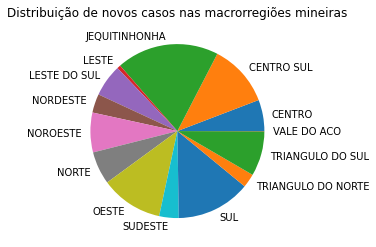

In [ ]:
print(plt.pie(valoresMacros,labels=regioes))
plt.title("Distribuição de novos casos nas macrorregiões mineiras")

## **19) Qual a vacina mais aplicada em todo o estado ?**

A vacina mais aplicada em MG é a ASTRAZENECA com 6457910 doses distribuidas


,Nome,Quantidade
0,ASTRAZENECA,6457910
1,CORONAVAC,4937783
2,JANSSEN,373220
3,PFIZER,1479438


Text(0.5, 0, 'Vacina')

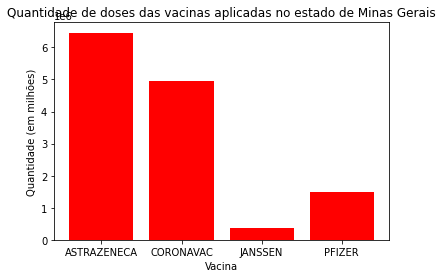

In [ ]:
infoVacinas = dadosVacinacao.groupby([5]).size().reset_index(name="Quantidade").rename(columns={5: 'Nome'}).head(4)
print(f"A vacina mais aplicada em MG é a {infoVacinas.iloc[0,0]} com {infoVacinas.iloc[0,1]} doses distribuidas")
display(infoVacinas)
plt.bar(infoVacinas.Nome, infoVacinas.Quantidade,color = 'red')
plt.title("Quantidade de doses das vacinas aplicadas no estado de Minas Gerais")
plt.ylabel("Quantidade (em milhões)")
plt.xlabel("Vacina")

## **20) Qual a cidade mineira que apresentou o maior percentual de diminuição de óbitos pós início da vacinação ?**

In [ ]:
maiorMortes = -999999999999999
cidadeMaiorMortes = ""

menorMortes = 999999999999999
cidadeMenorMortes = ""
#lista_cidades_mg = ["CURVELO"]

somaMacro = 0
for i in lista_cidades_mg:
  #print(f"Macro: {i}")
  #cidadesMacro = listaCidadesMacro(i)

  casosAntes = dfAntes[dfAntes[0]==i]
  #numCasosAntes = casosAntes[16].sum()
  numObitosAntes = casosAntes[17].sum()
  #print(f"Número de casos antes da vacinação: {numCasosAntes}")
  #print(f"Número de óbitos antes da vacinação: {numObitosAntes}")


  casosDepois = dfDepois[dfDepois[0]==i]
  #numCasosDepois = casosDepois[16].sum()
  numObitosDepois = casosDepois[17].sum()
  #print(f"Número de casos depois da vacinação: {numCasosDepois}")
  #print(f"Número de óbitos depois da vacinação: {numObitosDepois}")
  #print(f"Houve um aumento de {((numCasosDepois-numCasosAntes)/numCasosAntes)*100}% no número de novos casos.")
  #print(f"Houve um aumento de {((numObitosDepois-numObitosAntes)/numObitosAntes)*100}% no número óbitos.")
  #taxaCasos = (numCasosDepois-numCasosAntes)/numCasosAntes
  if (numObitosAntes!=0):
    taxaObitos = (numObitosDepois-numObitosAntes)/numObitosAntes
  

  if ((taxaObitos > maiorMortes)):
    maiorMortes = taxaObitos
    cidadeMaiorMortes = i
  elif ((taxaObitos < menorMortes)):
    menorMortes = taxaObitos
    cidadeMenorMortes = i
 
print(f"Cidade com o maior percentual de aumento de novas mortes: {cidadeMaiorMortes} com {maiorMortes*100}%.")
print(f"Cidade com o menor percentual de aumento de novas mortes: {cidadeMenorMortes} com {menorMortes*100}%.")


Cidade com o maior percentual de aumento de novas mortes: LAGOA GRANDE com 2800.0%.
Cidade com o menor percentual de aumento de novas mortes: DIOGO DE VASCONCELOS com -200.0%.


## **21) Qual a macrorregião que apresentou o maior percentual de diminuição de óbitos pós início da vacinação ? Ela foi a que possuiu o menor índice de novos casos nesse mesmo período ?**

Macrorregião com o maior percentual de aumento de novas mortes: JEQUITINHONHA com 365.51724137931035%.
Macrorregião com o menor percentual de aumento de novas mortes: VALE DO ACO com 24.691358024691358%.


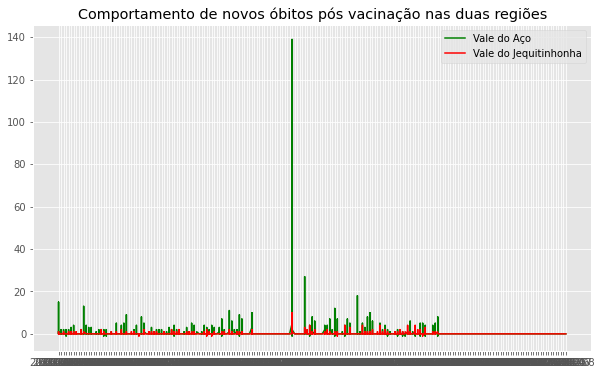

In [ ]:
maiorMortes = -999999999999999
macroMaiorMortes = ""

menorMortes = 9999999999999999
macroMenorMortes = ""
serieMenor = pd.DataFrame()
serieMaior = pd.DataFrame()

somaMacro = 0
for i in regioes:
  #print(f"Macro: {i}")
  cidadesMacro = listaCidadesMacro(i)

  casosAntes = dfAntes[dfAntes[0].isin(cidadesMacro)]
  #numCasosAntes = casosAntes[16].sum()
  numObitosAntes = casosAntes[17].sum()
  #print(f"Número de casos antes da vacinação: {numCasosAntes}")
  #print(f"Número de óbitos antes da vacinação: {numObitosAntes}")


  casosDepois = dfDepois[dfDepois[0].isin(cidadesMacro)]
  #numCasosDepois = casosDepois[16].sum()
  numObitosDepois = casosDepois[17].sum()
  #print(f"Número de casos depois da vacinação: {numCasosDepois}")
  #print(f"Número de óbitos depois da vacinação: {numObitosDepois}")
  #print(f"Houve um aumento de {((numCasosDepois-numCasosAntes)/numCasosAntes)*100}% no número de novos casos.")
  #print(f"Houve um aumento de {((numObitosDepois-numObitosAntes)/numObitosAntes)*100}% no número óbitos.")
  if (numObitosAntes>0):
    taxaObitos = (numObitosDepois-numObitosAntes)/numObitosAntes
    somaMacro = taxaCasos
    

    if ((taxaObitos < menorMortes)):
      menorMortes = taxaObitos
      macroMenorObitos = i
      serieMenor = casosDepois.loc[:,[0,2,17]]
    elif ((taxaObitos > maiorMortes)):
      maiorMortes = taxaObitos
      macroMaiorObitos = i
      serieMaior = casosDepois.loc[:,[0,2,17]]
  somaMacro = 0


plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
print(f"Macrorregião com o maior percentual de aumento de novas mortes: {macroMaiorObitos} com {maiorMortes*100}%.")
print(f"Macrorregião com o menor percentual de aumento de novas mortes: {macroMenorObitos} com {menorMortes*100}%.")
print(plt.plot(serieMenor[2],serieMenor[17],color="green",label="Vale do Aço"))
plt.title("Comportamento de novos óbitos pós vacinação nas duas regiões")
print(plt.plot(serieMaior[2],serieMaior[17],color="red",label="Vale do Jequitinhonha"))
plt.legend()





## **22) Qual a vacina mais utilizada na macrorregião que possui a menor taxa de óbitos pós início da vacinação ? E na macro de maior taxa de óbitos ?**

In [ ]:
cidadesValeDoAco = listaCidadesMacro("VALE DO ACO")
df22 = dadosVacinacao[dadosVacinacao[3].isin(cidadesValeDoAco)]
df22 = df22.groupby([5]).size().reset_index(name="Quantidade").rename(columns={5: 'Nome'})

df22_1 = dadosVacinacao[dadosVacinacao[3].isin(cidadesJequi)]
df22_1 = df22_1.groupby([5]).size().reset_index(name="Quantidade").rename(columns={5: 'Nome'})

print(f"A vacina mais aplicada em ambas as macros é a {df22_1.iloc[0,0]}.")

A vacina mais aplicada em ambas as macros é a ASTRAZENECA.


## **23) Como está a vacinação por faixa etária em todo o estado ? Quais as faixas etárias que mais vacinaram e as que menos vacinaram ?**

,Faixa etária,Quantidade
0,1 a 9 anos,142
1,10 a 19 anos,74213
2,20 a 29 anos,803405
3,30 a 39 anos,1585328
4,40 a 49 anos,2408787
5,50 a 59 anos,2439773
6,60 a 69 anos,3027407
7,70 a 79 anos,1931058
8,80 a 89 anos,808322
9,90 ou mais,169843


Text(0.5, 1.0, 'Distribuição da vacinação por faixa etária')

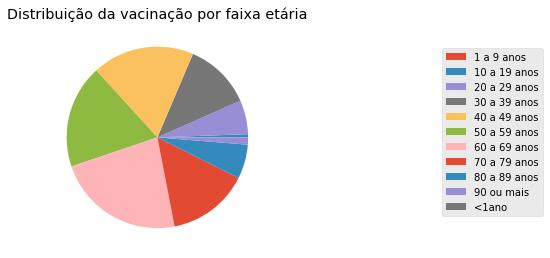

In [ ]:
faixaIdade = dadosVacinacao.groupby(1).size().reset_index(name="Quantidade").rename(columns={1: 'Faixa etária'}).head(11)
display(faixaIdade)
plt.figure(figsize=(7,7))
pie = plt.pie(faixaIdade.Quantidade)
#plt.tight_layout()

plt.legend(pie[0],faixaIdade["Faixa etária"], bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Distribuição da vacinação por faixa etária")


# **Relatório de Desenvolvimento do Trabalho Prático - Parte 3:**

## Análise Exploratória:
#### Nesta etapa, visamos manter um enfoque nas perguntas que havíamos levantado na Parte 1 deste projeto, juntamente com as sugestões dadas pelo professor. Dessa forma, visamos responder tais questões e, paralelamente, procurar correlacionar os atributos presentes nos atributos dos Bancos de Dados previamente preparados.

#### Ao passo que íamos desenvolvendo algumas análises, refatoramos algumas questões que não faziam muito sentido e/ou derivavam em alguma limitação de hardware para serem desenvolvidas, visto que os Bancos de Dados possuem um tamanho considerável. Além disso, adicionamos alguns tratamentos nos dados bem específicos que foram surgindo à medida em que "debulhavamos" os dados e fazíamos análises mais profundas.

#### Por fim, decidimos manter todos os resultados no próprio Notebook, visando evitar retrabalhos e que, além disso, no arquivo em questão fazemos algumas discussões pertinentes àqueles momentos de desenvolvimento e às questões envolvidas naquele determinado momento. Sendo assim, os resultados desta etapa são acessados mediante ao arquivo "TP-iCD.ipynb" neste diretório (Parte 3).

## Esclarecimentos Prévios:
#### Durante algumas análises, buscamos informações a nível municipal. Dessa forma, algumas vezes referenciamos, por exemplo, "Taxa de Novos Casos" como sendo uma proporção entre os números de Novos Casos e a População de cada cidade. Decidimos manter essa abordagem (Novos Casos/População) como forma de obter um mesmo dimensionamento analítico para todas as cidades de MG, de forma a não ter uma análise tão deturpada devido ao fato de diferentes tamanhos populacionais. Sendo assim, mesmo que duas cidades A e B tenham uma grande diferença entre os números de Novos Casos, a nossa análise leva em conta esses números em relação à população de seu próprio município.



# Parte 4: Predição

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(label)

0                                              city
1                                    city_ibge_code
2                                              date
3                              epidemiological_week
4                              estimated_population
5                         estimated_population_2019
6                                           is_last
7                                       is_repeated
8                          last_available_confirmed
9     last_available_confirmed_per_100k_inhabitants
10                              last_available_date
11                        last_available_death_rate
12                            last_available_deaths
13                                  order_for_place
14                                       place_type
15                                            state
16                                    new_confirmed
17                                       new_deaths
Name: 0, dtype: object


In [ ]:
regioes = dadosVacinacao.loc[:,4]
regioes = np.array(regioes)
df_cidades_regiao = dadosVacinacao.loc[1:,[3,4]].drop_duplicates(subset = 3)
lista_cidades_mg = np.array(df_cidades_regiao[3])  
df_cidades_regiao
macros = []
def listaCidadesMacro(macro): 
  return np.sort(np.array(df_cidades_regiao[3][df_cidades_regiao[4] == macro]))
def listaMacros():
    return(df_cidades_regiao.loc[:,4].unique())

def modelo(dataIni,dataFinal):
  periodo = ((dadosMG[2] >= dataIni) & (dadosMG[2] <= dataFinal))
  df_periodo = dadosMG[periodo]  
  df = pd.DataFrame()
  #dadosVacinacao.loc[:,[4,6]].sort_values([6])
  #display(df_periodo) #= (df_periodo.loc[:,[4,6]].sort_values([6]).groupby([4]).size().reset_index(name='Vacinados').rename(columns={4: 'Região'}))
  macros = listaMacros() 
  mediaMacro = 0
  mediaObt = 0
  nomesCidades = []
  mediaCasosCidade = []
  mediaObitosCidade = []
  macroReg = []
  for i in macros:
      cidadesMacro = listaCidadesMacro(i)
      for j in cidadesMacro:
        mediaMacro += df_periodo[16][df_periodo[0] == j].sum()/len(df_periodo)
        mediaObt += df_periodo[17][df_periodo[0] == j].sum()/len(df_periodo)
        if (mediaMacro!=0):
          nomesCidades.append(j)
          mediaCasosCidade.append(mediaMacro)
          mediaObitosCidade.append(mediaObt)
          macroReg.append(i)
          #print(f"A media da cidade {j} é = {mediaMacro}")
        mediaMacro = 0
    
  df["Cidade"] = nomesCidades
  df["MediaCasos"] = mediaCasosCidade
  df["MediaMortes"] = mediaObitosCidade
  df["Macrorregiao"] = macroReg
  return df

dados = modelo('2020-12-18','2021-04-18')
display(dados)

,Cidade,MediaCasos,MediaMortes,Macrorregiao
0,ABAETE,0.005583,0.000125,CENTRO
1,ARACAI,0.000423,0.000125,CENTRO
2,ARCOS,0.028501,0.000423,CENTRO
3,AUGUSTO DE LIMA,0.000932,0.000461,CENTRO
4,BALDIM,0.001634,0.000480,CENTRO
...,...,...,...,...
843,SAO FRANCISCO DE SALES,0.001192,0.137711,TRIANGULO DO SUL
844,TAPIRA,0.001124,0.137711,TRIANGULO DO SUL
845,UBERABA,0.097525,0.140690,TRIANGULO DO SUL
846,UNIAO DE MINAS,0.000279,0.140690,TRIANGULO DO SUL


In [ ]:
#dados[dados["Cidade"]=="VESPASIANO"]

In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# uberaba = dados.drop(axis=0,index=110)
# uberaba
# dadosAux = pd.DataFrame()
# dadosAux["MediaCasos"] = [0.027377] 
# dadosAux["MediaMortes"] = [0.041243]

model = tree.DecisionTreeClassifier(criterion="entropy")
#model = KNeighborsClassifier()
x_train,x_test,y_train,y_test = train_test_split(dados.loc[:,["MediaCasos","MediaMortes"]],dados.loc[:,"Macrorregiao"],test_size=1/4)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
print('coefficient of determination :', model.score(x_test, y_test))
j = 0;
print("ERROS: ")
for i in y_test:
    if (i!=y_predicted[j]):
      print(f"{i} == {y_predicted[j]}")
    j+=1
scores = cross_val_score(model, 
                x_test,
                y_test, cv=10)
print("Accuracy via Validação Cruzada da Decision Tree: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

coefficient of determination : 0.9905660377358491
ERROS: 
NORDESTE == OESTE
LESTE DO SUL == NOROESTE
Accuracy via Validação Cruzada da Decision Tree: 0.95 (+/- 0.08)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test,y_predicted))
print("Matriz de Confusão para a Árvore de Decisão: ")
print(confusion_matrix(y_test, model.predict(x_test)))

                    precision    recall  f1-score   support

            CENTRO       1.00      1.00      1.00        27
        CENTRO SUL       1.00      1.00      1.00        11
     JEQUITINHONHA       1.00      1.00      1.00         5
             LESTE       1.00      1.00      1.00        12
      LESTE DO SUL       1.00      0.92      0.96        12
          NORDESTE       1.00      0.92      0.96        13
          NOROESTE       0.88      1.00      0.93         7
             NORTE       1.00      1.00      1.00        25
             OESTE       0.94      1.00      0.97        16
           SUDESTE       1.00      1.00      1.00        24
               SUL       1.00      1.00      1.00        37
TRIANGULO DO NORTE       1.00      1.00      1.00         9
  TRIANGULO DO SUL       1.00      1.00      1.00         7
       VALE DO ACO       1.00      1.00      1.00         7

          accuracy                           0.99       212
         macro avg       0.99      0.9

# **Relatório de Desenvolvimento do Trabalho Prático - Parte 4:**

## Análise Preditiva:

####Nesta etapa do trabalho o grupo teve a ideia de treinar um modelo para a previsão das macroregiões de determinada cidade, assim criamos a correlação entre as macroregiões do banco de "Dados de Vacinação" com as incidencias de casos de covid e obitos, do banco de "Dados de Covid".

####Assim sendo, foi calculado a média de casos e óbitos agrupados por cidades, e estas, foram relacionadas com sua macroregião estabelecida na tabela "Dados Vacinação". Após o preparo inicial dos dados, o grupo decidiu por utilizar a abordagem 1:4, onde 80% dos dados foram utilizados para treino, e 20% para teste, e o algoritmo escolhido foi o de Árvore de decisão, importado da biblioteca sklearn.

## Resultados:

#### Após o teste com outros algoritmos, foi notado que o resultado apresentado pelo algoritmo de árvore de decisão foi o melhor, obtendo entre 98% +- 0.6% de acerto, e portanto o grupo decidiu por mantê-lo.
